In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

../output_videos/trimmed_boxes/cropped_img_1.jpg
../output_videos/trimmed_boxes/cropped_img_2.jpg
../output_videos/trimmed_boxes/cropped_img_3.jpg
../output_videos/trimmed_boxes/cropped_img_4.jpg
../output_videos/trimmed_boxes/cropped_img_5.jpg
../output_videos/trimmed_boxes/cropped_img_6.jpg
../output_videos/trimmed_boxes/cropped_img_7.jpg


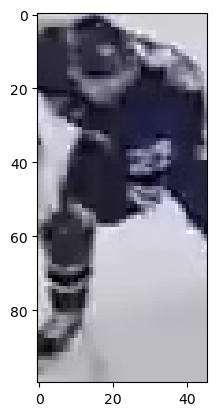

In [12]:
for i in range(7):
    image_path = f"../output_videos/trimmed_boxes/cropped_img_{i+1}.jpg"
    print(image_path)
    image = cv2.imread(image_path)
    image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)

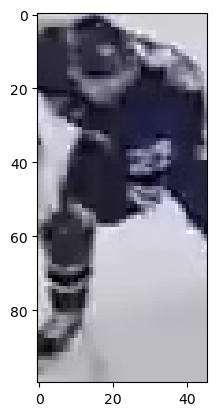

In [13]:
plt.imshow(image)

# Take Top half of image, top half is where the jersey is

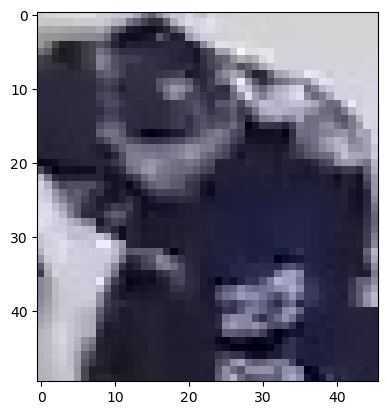

In [16]:
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

# Cluster the image into two clusters

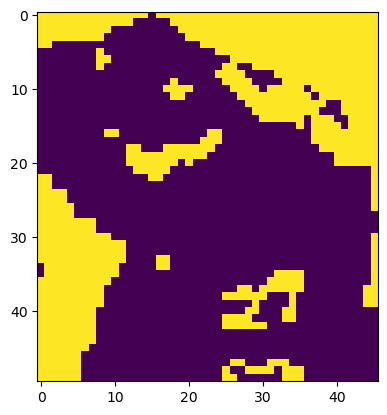

In [17]:
# Reshape the image into 2d array
image_2d = top_half_image.reshape(-1, 3)

# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape the labels into the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# display the clustered image
plt.imshow(clustered_image)
plt.show()

In [18]:
corner_clusters= [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)
index, counts = np.unique(clustered_image, return_counts=True)
print(counts[0])

1
1546


In [19]:
player_cluster = 1-non_player_cluster
amount_white = counts[non_player_cluster] / (counts[non_player_cluster] + counts[player_cluster])
print(amount_white)

0.3278260869565217


In [20]:
kmeans.cluster_centers_[player_cluster]
a = np.append(kmeans.cluster_centers_[player_cluster], amount_white)
print(a)

[45.93078913 43.73609314 65.12354463  0.32782609]
